# Spearman correlation
AIDS: Dados provenientes de http://www2.aids.gov.br/cgi/deftohtm.exe?tabnet/sp.def

TUBERCULOSE: Dados provenientes de http://tabnet.datasus.gov.br (cabeçalhos adaptados)

ONCOLOGIA: http://tabnet.datasus.gov.br/cgi/webtabx.exe?PAINEL_ONCO/PAINEL_ONCOLOGIABR.def

VIOLENCIA: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/violebr.def

Import libraries

In [2]:
import pandas as pd
import glob
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
    

Read suicide csv

In [3]:
suicide = pd.read_csv('../Suicide/suicide_count_res.csv', sep=',')

Read disease files

In [4]:
year = "2017"
disease = ""
all_files = glob.glob("*.csv")
diseases_list = []
corrs_list = []
p_value_list = []
sizes_list = []
for file in all_files:
    disease = file.split("BR")[0]
    file = pd.read_csv(disease + 'BR' + year + '.csv', sep=',')
    file = file[["QUANTIDADE", "MUNCOD"]]
    
    # Merge Files
    result = pd.merge(file, suicide, left_on="MUNCOD", right_on="CODMUNRES", how="inner")
    result = result[["QUANTIDADE", "SUICIDES"]]
    
    # Spearman correlation
    file_array = result.iloc[:,0].values
    suicides_array = result.iloc[:,1].values
    corr, p_value = spearmanr(file_array,suicides_array)
    
    # Append correlation
    sizes_list.append(result.shape[0])
    diseases_list.append(disease)
    corrs_list.append(corr)
    p_value_list.append(p_value)

Spearman correlations table

In [121]:
corrs_data = {'Doenças': diseases_list, 'Correlação com suicidio': corrs_list, 'P value': p_value_list, 'Número de municípios': sizes_list}
corrs_df = pd.DataFrame(data=corrs_data)
corrs_df

,Doenças,Correlação com suicidio,P value,Número de municípios
0,AIDS,0.577176,5.255339e-187,2102
1,CANCER,0.606616,3.922456e-308,3071
2,DENGUE,0.304702,1.651206e-49,2248
3,MENTAL,0.518291,8.602276e-199,2895
4,TUBERCULOSE,0.531558,1.012461e-188,2588
5,VIOLENCIA,0.516404,4.179197e-202,2969


Table with diseases and suicide numbers merged per city

In [6]:
result = suicide
for file in all_files:
    disease = file.split("BR")[0]
    file = pd.read_csv(disease + 'BR' + year + '.csv', sep=',')
    file = file[["QUANTIDADE", "MUNCOD"]]
    file.rename(columns={"QUANTIDADE": disease}, inplace=True)
    
    # Merge with current dataframe
    result = pd.merge(file, result, left_on="MUNCOD", right_on="CODMUNRES", how="inner")

# Add SUICIDES to columns
result = result[diseases_list + ["SUICIDES"]]
result

,AIDS,CANCER,DENGUE,MENTAL,TUBERCULOSE,VIOLENCIA,SUICIDES
0,25.0,66,60,92,36,93,10
1,9.0,133,24,32,26,33,5
2,10.0,28,32,10,18,19,2
3,4.0,15,253,5,2,5,1
4,2.0,11,2,4,2,4,1
...,...,...,...,...,...,...,...
1435,7.0,29,159,19,5,48,4
1436,2.0,7,45,10,1,7,1
1437,19.0,63,416,81,31,229,6
1438,1.0,10,36,29,1,3,1


Heatmap of the diseases and suicide

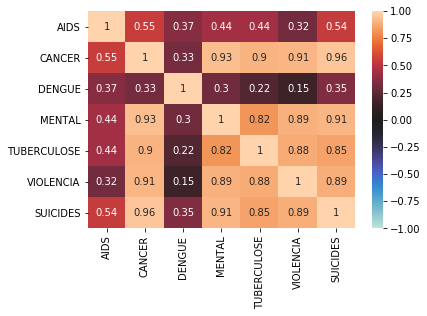

In [7]:
sns.heatmap(result.corr(), annot=True, vmin=-1, vmax=1, center=0)

Scatter plot to visualize relationship between suicide and dengue

In [ ]:
file = pd.read_csv('DENGUEBR2017.csv', sep=',')
file = file[["QUANTIDADE", "MUNCOD"]]
result = pd.merge(file, suicide, left_on="MUNCOD", right_on="CODMUNRES", how="inner")
result = result[["QUANTIDADE", "SUICIDES"]]
plt.scatter(result["QUANTIDADE"], result["SUICIDES"], s=5, color='#4e48ab')
plt.xlabel("Nº casos confirmados dengue")
plt.ylabel("Nº de suicídios")
plt.title("Dengue x Suicídio")
axes = plt.gca()
axes.set_xlim([0,2000])
axes.set_ylim([0,100])
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#f8fafb'
plt.rcParams['savefig.facecolor'] = '#33364f'
plt.savefig("dengue.png")